<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/Midterm_Abraham_Mathewv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IADS midterm

Please ensure all code is executed and the corresponding outputs are included. Write the code directly in this notebook rather than creating a new one.
Part 1: Multiple choice and theoretic questions

Please write your answer after each question
Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):

A) sample averages are at least 4% different

B) the samples follow the underlying distributions with the same mean

C) the samples follow the underlying distributions with the different mean

D) one can reject the null hypothesis that the samples follow the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follow the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

Answer: one can reject the null hypothesis that the samples follow the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-value is below 0.05

Question 2. What is true regarding normal and log-normal distributions:

A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

Answer: Logarithm of the log-normally distributed quantity follows a normal distribution

Question 3.

Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical (repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

Answer:The given task could also be described as finding 'groups of typical scenarios (repeated with minor deviations)' from satellite images. Hence, it implies typical clustering or pattern recognition with no predefined labels. In unsupervised learning, the model can be trained using input data with no target labels explicitly provided. For that reason, this works well with tasks like clustering or discovering hidden patterns in data. This flexible procedure justifies the term 'unsupervised learning' since no labels or supervision are mentioned here, and it can be applied to various scenarios.

Question 4.

Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

Answer:
Machine learning requires separate training, validation, and test samples for the model to generalize well to new, unseen data. Here is why each is important:

Training Sample: This forms the dataset on which the model is trained. The model learns the patterns, weights, or parameters from this data. However, just using training data results in overfitting, where a model may perform exceptionally well while trained with training data but poorly on unseen data.

Validation Sample: This is the dataset, which actually serves for tuning the model's hyperparameters and checking its performance during training. We will check for overfitting and modify model complexity because the performance is checked against a validation set that is different from those used to train. It assists in the selection of the best version of the model, for example, during cross-validation or optimizing hyperparameters.

Test Sample: The test set is used only when the model is finalized. This ensures an unbiased estimate of the model's performance on completely unseen data and how it would fare in practical scenarios. It is expected to avoid tuning the model on this data to avoid leakage or biased results.

When would you need all three?

It would help if we had all three-training, validation, and test-in cases where:
We are working with a large dataset. Hyperparameter tuning or model selection needs to be done and want to evaluate model performance from the tuning process independently.

For smaller datasets or simpler models, we can use training and test sets alone, applying cross-validation on the training data instead. For most real-world deep learning and complex models, though, using all three together is normally best practice to avoid overfitting and ensure a really robust evaluation of model performance.




Part 2: NYPD data analysis

In this part, you need to download New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing download NYPD complaints data:

two options:
        
        * download with curl or urllib methods
        * download with API

In [4]:
# !pip install rtree
# !pip install pygeos
# !pip install geopandas

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a directory in Google Drive to save the file (if needed)
import os
save_path = '/content/drive/My Drive/NYPD_data/'
os.makedirs(save_path, exist_ok=True)

# Download the file using curl and save it in Google Drive
!curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

# Move the downloaded file to the created directory in Google Drive
!mv NYPD_data.csv /content/drive/MyDrive/NYPD_DATANEW


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2891M    0 2891M    0     0  4470k      0 --:--:--  0:11:02 --:--:-- 4656k


In [7]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/NYPD_data.csv', low_memory=False)
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,25640826H10611,12/05/2006,10:38:00,NaN,(null),NaN,12/05/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO QUEENS NORTH,(null),25-44,WHITE HISPANIC,M
1,16631501H8965,08/25/1973,12:15:00,NaN,(null),NaN,05/29/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO MAN NORTH,(null),45-64,BLACK,F
2,11118212H8714,04/22/2006,16:50:00,NaN,(null),NaN,04/22/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),45-64,BLACK,M
3,23471265H9399,07/20/2006,22:37:00,NaN,(null),NaN,07/20/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),18-24,BLACK,M
4,24565927H10142,04/14/2006,02:37:00,NaN,(null),NaN,04/14/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,(null),45-64,BLACK,M


In [8]:
data.shape

(8914838, 35)

In [9]:
data.OFNS_DESC.unique()

array(['MURDER & NON-NEGL. MANSLAUGHTER', 'ROBBERY', 'ARSON', 'FRAUDS',
       'FELONY ASSAULT', 'GRAND LARCENY OF MOTOR VEHICLE',
       'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY',
       'HARRASSMENT 2', 'GRAND LARCENY', 'DANGEROUS DRUGS', 'ESCAPE 3',
       '(null)', 'RAPE', 'DANGEROUS WEAPONS', 'SEX CRIMES', 'FORGERY',
       'MISCELLANEOUS PENAL LAW', 'GAMBLING',
       'OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL MISCHIEF & RELATED OF',
       'OFFENSES AGAINST PUBLIC ADMINI', 'VEHICLE AND TRAFFIC LAWS',
       'INTOXICATED & IMPAIRED DRIVING', 'POSSESSION OF STOLEN PROPERTY',
       'OFFENSES AGAINST THE PERSON', 'THEFT-FRAUD',
       'ADMINISTRATIVE CODE', 'CRIMINAL TRESPASS',
       'UNAUTHORIZED USE OF A VEHICLE', 'OFFENSES INVOLVING FRAUD',
       'KIDNAPPING & RELATED OFFENSES', 'NYS LAWS-UNCLASSIFIED FELONY',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'OFFENSES AGAINST PUBLIC SAFETY',
       'PROSTITUTION & RELATED OFFENSES', "BURGLAR'S TOOLS",
       'PETIT L

In [10]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')


Section 1 - Data cleaning tasks
We have completed the majority of the data cleaning tasks, but there are still a few remaining items for you to address.(Marked as 'todo')

    1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
    2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
    3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
    Filter by area (drop rows with location outside NYC)



1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [11]:
data.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,655
CMPLNT_FR_TM,0
CMPLNT_TO_DT,1818958
CMPLNT_TO_TM,0
ADDR_PCT_CD,771
RPT_DT,0
KY_CD,0
OFNS_DESC,0
PD_CD,7593


In [12]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

In [13]:
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time

In [14]:
print(data.CMPLNT_FR_DT.isna().sum())
print(data.CMPLNT_FR_TM.isna().sum())

828
48


In [15]:
data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], inplace=True)
data.shape

(8913963, 35)

In [16]:
data.drop_duplicates(subset=['CMPLNT_NUM'], inplace=True)
data.shape

(8912859, 35)

In [17]:
data.BORO_NM.unique()

array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       '(null)'], dtype=object)

In [3]:
import pandas as pd

# Load the data with low_memory=False to prevent DtypeWarning
data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/NYPD_data.csv', low_memory=False)

# Data Cleaning: Remove rows where 'BORO_NM' is NaN or '(null)'
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)'

In [4]:
data.BORO_NM.unique()

array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND'],
      dtype=object)

2. Remove rows where location is parks or greenspace and filter for 2019 and after

In [5]:
## check the timeline of data
print(data.sort_values(by='CMPLNT_FR_DT', ascending=True).head(3)['CMPLNT_FR_DT'])
print(data.sort_values(by='CMPLNT_FR_DT', ascending=False).head(3)['CMPLNT_FR_DT'])

1510125    01/01/1948
7398088    01/01/1955
6987596    01/01/1955
Name: CMPLNT_FR_DT, dtype: object
8894379    12/31/2023
8610795    12/31/2023
8420173    12/31/2023
Name: CMPLNT_FR_DT, dtype: object


In [1]:
import pandas as pd
# Load the data
data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/NYPD_data.csv', low_memory=False)

# Remove rows where 'BORO_NM' is NaN or '(null)'
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)'

# Filter the data by date after 2019-01-01
if 'CMPLNT_FR_DT' in data.columns:
    # Convert the 'CMPLNT_FR_DT' column to datetime
    data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

    # Filter out the data before 2019-01-01
    start_date = pd.to_datetime('2019-01-01')
    filtered_data = data[data['CMPLNT_FR_DT'] >= start_date]

    # Check the earliest and latest dates
    print(filtered_data.sort_values(by='CMPLNT_FR_DT', ascending=True).head(3)['CMPLNT_FR_DT'])
    print(filtered_data.sort_values(by='CMPLNT_FR_DT', ascending=False).head(3)['CMPLNT_FR_DT'])

    # Step 3: Save the filtered data to a new CSV file
    filtered_data.to_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_data_2019_onwards.csv', index=False)

    print("Filtered data has been saved successfully.")
else:
    print("Column 'CMPLNT_FR_DT' not found in the DataFrame. Please check your data or column name.")


6608614   2019-01-01
8639461   2019-01-01
6813678   2019-01-01
Name: CMPLNT_FR_DT, dtype: datetime64[ns]
8638585   2023-12-31
8684374   2023-12-31
8747333   2023-12-31
Name: CMPLNT_FR_DT, dtype: datetime64[ns]
Filtered data has been saved successfully.


In [2]:
Pdata.shape

(8906954, 35)

In [3]:
data.PARKS_NM.unique()

array(['(null)', 'TOMPKINSVILLE PARK', 'STAPLETON PLAYGROUND', ...,
       'CORONA HEALTH SANCTUARY', 'SOUTHERN FIELDS',
       'GARDEN AT BEACH 36TH STREET'], dtype=object)

In [4]:
import pandas as pd

# Load the filtered data from the CSV file
filtered_data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_data_2019_onwards.csv', low_memory=False)

# Apply the filter to keep only rows where 'PARKS_NM' is '(null)'
filtered_data = filtered_data[filtered_data['PARKS_NM'] == '(null)']

# Check the shape of the filtered data
print(filtered_data.shape)

# filtered data to a new CSV file without parks
filtered_data.to_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_data_no_parks.csv', index=False)

print("Filtered data (no parks) has been saved successfully.")


(2376447, 35)
Filtered data (no parks) has been saved successfully.


In [5]:
data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_data_no_parks.csv', low_memory=False)

# Remove rows where 'BORO_NM' is NaN or '(null)'
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)'

# Filter the data by date after 2019-01-01
if 'CMPLNT_FR_DT' in data.columns:
    # Convert the 'CMPLNT_FR_DT' column to datetime
    data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

    # Filter out the data before 2019-01-01
    start_date = pd.to_datetime('2019-01-01')
    filtered_data = data[data['CMPLNT_FR_DT'] >= start_date]

    # Check the earliest and latest dates
    print(filtered_data.sort_values(by='CMPLNT_FR_DT', ascending=True).head(3)['CMPLNT_FR_DT'])
    print(filtered_data.sort_values(by='CMPLNT_FR_DT', ascending=False).head(3)['CMPLNT_FR_DT'])


357233   2019-01-01
204021   2019-01-01
20867    2019-01-01
Name: CMPLNT_FR_DT, dtype: datetime64[ns]
1871915   2023-12-31
2335508   2023-12-31
2250773   2023-12-31
Name: CMPLNT_FR_DT, dtype: datetime64[ns]



3. keep type 1 crimes as defined by FBI from the data :

https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"


In [6]:
data.OFNS_DESC.unique()

array(['SEX CRIMES', 'HARRASSMENT 2', 'PETIT LARCENY', 'ARSON', 'ROBBERY',
       'RAPE', 'MISCELLANEOUS PENAL LAW', 'ASSAULT 3 & RELATED OFFENSES',
       'BURGLARY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'DANGEROUS WEAPONS',
       'FELONY ASSAULT', 'POSSESSION OF STOLEN PROPERTY',
       'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS',
       'VEHICLE AND TRAFFIC LAWS', 'GRAND LARCENY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'ADMINISTRATIVE CODE',
       'THEFT-FRAUD', 'DANGEROUS DRUGS', 'OFFENSES AGAINST PUBLIC ADMINI',
       'INTOXICATED & IMPAIRED DRIVING', 'OFFENSES AGAINST THE PERSON',
       'GRAND LARCENY OF MOTOR VEHICLE', 'NYS LAWS-UNCLASSIFIED FELONY',
       'FRAUDS', 'OTHER STATE LAWS (NON PENAL LA',
       'UNAUTHORIZED USE OF A VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
       'FORGERY', 'DISRUPTION OF A RELIGIOUS SERV',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'ENDAN WELFARE INCOMP',
       'KIDNAPPING', 'LOITERING/GAMBLING (CARDS, DIC',
       'OFFENSES I

In [7]:
data_type1 = data[data.OFNS_DESC.isin(['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'])]
data_type1.reset_index(drop=True, inplace=True)
data_type1.shape

(542421, 35)

In [8]:
data_type1.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,238829557,2022-01-06,23:09:00,NaN,(null),6.0,01/08/2022,114,ARSON,263.0,...,U,NaN,40.734408,-73.990849,"(40.734408, -73.990849)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E
1,239387040,2022-01-19,15:50:00,NaN,(null),44.0,01/19/2022,105,ROBBERY,366.0,...,M,NaN,40.832505,-73.914543,"(40.832505, -73.914543)",PATROL BORO BRONX,(null),45-64,BLACK,M
2,238552254,2021-12-31,00:01:00,NaN,(null),17.0,01/02/2022,104,RAPE,157.0,...,M,NaN,40.756820,-73.971143,"(40.7568201683051, -73.9711432633524)",PATROL BORO MAN SOUTH,(null),25-44,WHITE,F
3,245253070,2022-05-18,12:05:00,NaN,(null),43.0,05/18/2022,105,ROBBERY,380.0,...,M,NaN,40.835343,-73.865076,"(40.83534287, -73.86507554)",PATROL BORO BRONX,(null),25-44,UNKNOWN,M
4,245512210,2022-05-08,21:30:00,NaN,(null),107.0,05/23/2022,104,RAPE,159.0,...,M,NaN,40.730113,-73.810909,"(40.7301130668694, -73.8109089148815)",PATROL BORO QUEENS SOUTH,(null),25-44,BLACK,F


In [9]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_data_no_parks.csv', low_memory=False)

# Remove rows where 'BORO_NM' is NaN or '(null)'
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)'

# Filter only Type 1 crimes
type_1_crimes = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
                 'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER',
                 'RAPE', 'ROBBERY']

# Filter the data to keep only rows where 'OFNS_DESC' is in the list of Type 1 crimes
filtered_data = data[data['OFNS_DESC'].isin(type_1_crimes)]

# Step 5: Save the filtered data to a new CSV file
filtered_data.to_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_Type_1_Crimes_2019_onwards.csv', index=False)

print("Filtered Type 1 crimes data has been saved successfully.")


Filtered Type 1 crimes data has been saved successfully.


In [10]:
filtered_data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
3,238829557,2022-01-06,23:09:00,NaN,(null),6.0,01/08/2022,114,ARSON,263.0,...,U,NaN,40.734408,-73.990849,"(40.734408, -73.990849)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E
4,239387040,2022-01-19,15:50:00,NaN,(null),44.0,01/19/2022,105,ROBBERY,366.0,...,M,NaN,40.832505,-73.914543,"(40.832505, -73.914543)",PATROL BORO BRONX,(null),45-64,BLACK,M
5,238552254,2021-12-31,00:01:00,NaN,(null),17.0,01/02/2022,104,RAPE,157.0,...,M,NaN,40.756820,-73.971143,"(40.7568201683051, -73.9711432633524)",PATROL BORO MAN SOUTH,(null),25-44,WHITE,F
6,245253070,2022-05-18,12:05:00,NaN,(null),43.0,05/18/2022,105,ROBBERY,380.0,...,M,NaN,40.835343,-73.865076,"(40.83534287, -73.86507554)",PATROL BORO BRONX,(null),25-44,UNKNOWN,M
9,245512210,2022-05-08,21:30:00,NaN,(null),107.0,05/23/2022,104,RAPE,159.0,...,M,NaN,40.730113,-73.810909,"(40.7301130668694, -73.8109089148815)",PATROL BORO QUEENS SOUTH,(null),25-44,BLACK,F


In [11]:
# Check the shape of the filtered data
print(filtered_data.shape)

# Checking a few rows to verify the filter was applied correctly
print(filtered_data.head())

(542421, 35)
  CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  ADDR_PCT_CD  \
3  238829557   2022-01-06     23:09:00          NaN       (null)          6.0   
4  239387040   2022-01-19     15:50:00          NaN       (null)         44.0   
5  238552254   2021-12-31     00:01:00          NaN       (null)         17.0   
6  245253070   2022-05-18     12:05:00          NaN       (null)         43.0   
9  245512210   2022-05-08     21:30:00          NaN       (null)        107.0   

       RPT_DT  KY_CD OFNS_DESC  PD_CD  ... SUSP_SEX TRANSIT_DISTRICT  \
3  01/08/2022    114     ARSON  263.0  ...        U              NaN   
4  01/19/2022    105   ROBBERY  366.0  ...        M              NaN   
5  01/02/2022    104      RAPE  157.0  ...        M              NaN   
6  05/18/2022    105   ROBBERY  380.0  ...        M              NaN   
9  05/23/2022    104      RAPE  159.0  ...        M              NaN   

    Latitude  Longitude                                Lat_Lon  \
3

In [12]:
offense_descriptions = filtered_data['OFNS_DESC'].unique()
print(offense_descriptions)
print(f"Number of unique offense descriptions: {len(offense_descriptions)}")

['ARSON' 'ROBBERY' 'RAPE' 'BURGLARY' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'FELONY ASSAULT' 'GRAND LARCENY' 'GRAND LARCENY OF MOTOR VEHICLE']
Number of unique offense descriptions: 8


In [13]:
offense_counts = filtered_data['OFNS_DESC'].value_counts()
print("Total count for each offense type:")
print(offense_counts)

Total count for each offense type:
OFNS_DESC
GRAND LARCENY                      217389
FELONY ASSAULT                     117163
ROBBERY                             73040
BURGLARY                            68635
GRAND LARCENY OF MOTOR VEHICLE      54265
RAPE                                 6493
ARSON                                3415
MURDER & NON-NEGL. MANSLAUGHTER      2021
Name: count, dtype: int64


In [14]:
start_date = filtered_data['CMPLNT_FR_DT'].min()
end_date = filtered_data['CMPLNT_FR_DT'].max()
print("\nEarliest (Start) Date:", start_date)
print("Latest (End) Date:", end_date)


Earliest (Start) Date: 2019-01-01
Latest (End) Date: 2023-12-31


In [15]:
print("\nUnique values in 'PARKS_NM' column:")
print(filtered_data['PARKS_NM'].unique())


Unique values in 'PARKS_NM' column:
['(null)']



4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". We also have already used it in homework 2.

Do a spatial joint to keep only rows within NYC


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import zipfile
import os

# Path to the ZIP file and the target extraction directory
zip_file_path = '/content/drive/MyDrive/NYPD_DATANEW/ZIPCODE.zip'
extract_to_path = '/content/drive/MyDrive/NYPD_DATANEW/ZIPCODE'

# Ensure the extraction directory exists; if not, create it
if not os.path.exists(extract_to_path):
    os.makedirs(extract_to_path)
    print(f"Folder created: {extract_to_path}")
else:
    print(f"Folder already exists: {extract_to_path}")

# Unzip the file to the specified directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)  # Extract to 'ZIPCODE' directory

# Checking the contents of the extracted directory
extracted_files = os.listdir(extract_to_path)
print(f"Extracted files: {extracted_files}")


Folder already exists: /content/drive/MyDrive/NYPD_DATANEW/ZIPCODE
Extracted files: ['ZIP_CODE_040114.shx', 'ZIP_CODE_040114.dbf', 'ZIP_CODE_040114.prj', 'ZIP_CODE_040114.sbn', 'ZIP_CODE_040114.sbx', 'ZIP_CODE_040114.shp', 'ZIP_CODE_040114.shp.xml']


In [18]:
!pip install geopandas

import geopandas as gpd

# Path to the shapefile (.shp) file inside the extracted folder
shapefile_path = '/content/drive/MyDrive/NYPD_DATANEW/ZIPCODE/ZIP_CODE_040114.shp'

# Read the shapefile using geopandas
zips = gpd.read_file(shapefile_path)

# Display the first few rows of the shapefile data
zips.head()


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [19]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<Axes: >

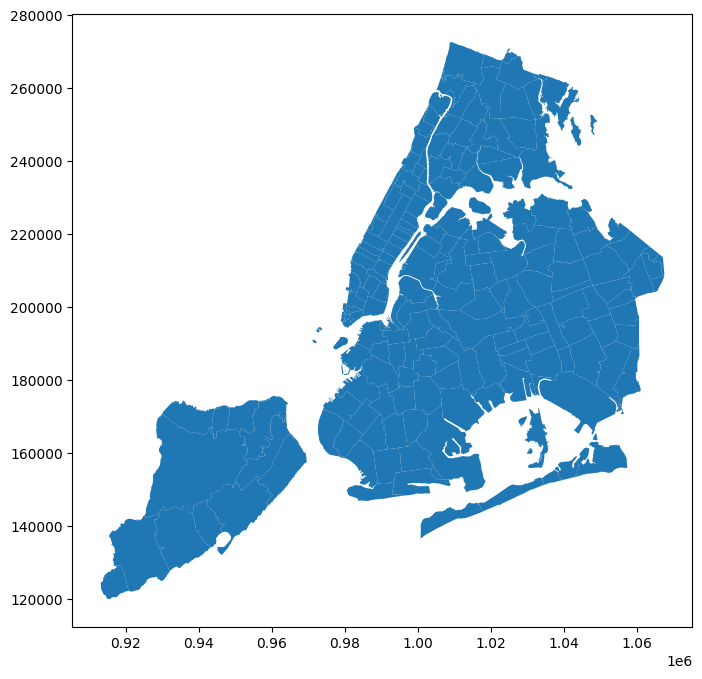

In [20]:
zips.plot(figsize=(8,8))

Unique COUNTY values in the shapefile:
['Queens' 'Kings' 'Bronx' 'New York' 'Richmond']
Shapefile plotted


<ipython-input-22-cf8713908f5d>:17: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_Type_1_Crimes_2019_onwards.csv')


  CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  ADDR_PCT_CD  \
0  238829557   2022-01-06     23:09:00          NaN       (null)          6.0   
1  239387040   2022-01-19     15:50:00          NaN       (null)         44.0   
2  238552254   2021-12-31     00:01:00          NaN       (null)         17.0   
3  245253070   2022-05-18     12:05:00          NaN       (null)         43.0   
4  245512210   2022-05-08     21:30:00          NaN       (null)        107.0   

       RPT_DT  KY_CD OFNS_DESC  PD_CD  ... POPULATION          AREA STATE  \
0  01/08/2022    114     ARSON  263.0  ...    55878.0  1.553838e+07    NY   
1  01/19/2022    105   ROBBERY  366.0  ...    89390.0  2.993345e+07    NY   
2  01/02/2022    104      RAPE  157.0  ...    33135.0  1.272834e+07    NY   
3  05/18/2022    105   ROBBERY  380.0  ...    56670.0  3.515567e+07    NY   
4  05/23/2022    104      RAPE  159.0  ...    40528.0  6.938587e+07    NY   

     COUNTY ST_FIPS CTY_FIPS                   URL

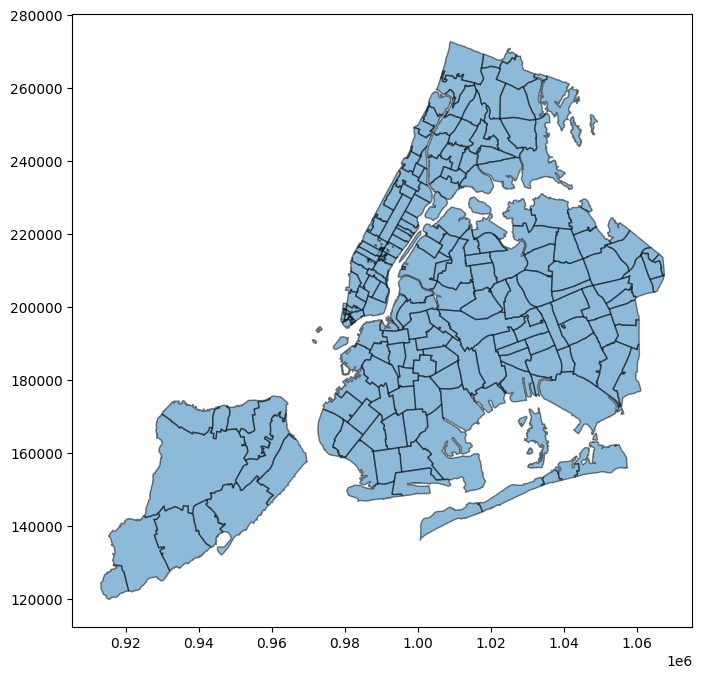

In [22]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# ZIP code shapefile (NYC boundaries)
zips = gpd.read_file('/content/drive/MyDrive/NYPD_DATANEW/ZIPCODE/ZIP_CODE_040114.shp')

# Check unique COUNTY values in the ZIP shapefile
print("Unique COUNTY values in the shapefile:")
print(zips.COUNTY.unique())

# Plot the NYC boundaries to visualize the shapefile
zips.plot(figsize=(8, 8), edgecolor='black', alpha=0.5)
print("Shapefile plotted")

# Load the filtered crime data (already filtered for Type 1 crimes after 2019)
crime_data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/filtered_NYPD_Type_1_Crimes_2019_onwards.csv')

# Create a geometry column from 'Longitude' and 'Latitude'
crime_data['geometry'] = crime_data.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)

# Convert the DataFrame to a GeoDataFrame
geoCrime = gpd.GeoDataFrame(crime_data, geometry='geometry')

# Set the CRS to WGS84 (EPSG:4326) for both GeoDataFrames
geoCrime = geoCrime.set_crs(epsg=4326)
zips = zips.to_crs(epsg=4326)

# Spatial join to keep only crime points within NYC boundaries
geoCrime_within_nyc = gpd.sjoin(geoCrime, zips, how='inner', predicate='within')

# Map 'COUNTY' to borough names
county_to_borough = {
    'New York': 'Manhattan',
    'Kings': 'Brooklyn',
    'Queens': 'Queens',
    'Bronx': 'Bronx',
    'Richmond': 'Staten Island'
}

# Add a new 'BOROUGH' column by mapping the 'COUNTY' column from the spatial join
geoCrime_within_nyc['BOROUGH'] = geoCrime_within_nyc['COUNTY'].map(county_to_borough)

# Convert the resulting GeoDataFrame to New York State Plane Coordinate System (EPSG:2263)
geoCrime_within_nyc = geoCrime_within_nyc.to_crs(epsg=2263)

# Save the filtered crime points within NYC to a CSV file
geoCrime_within_nyc.drop(columns='geometry').to_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', index=False)

# Verify the first few rows of the filtered data
print(geoCrime_within_nyc.head())


Section 2 -Exploratory analysis tasks

    Visualize the time series of the total number of type 1 crimes for the whole city per day.
    Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
    Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
    Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
    Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough



Task 1: Time series plot of total Type 1 crimes per day across the city.

    # --- Task 1: Time Series of Total Type 1 Crimes Per Day ---

<ipython-input-26-3d6fea387b1f>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv') #updated filterd data


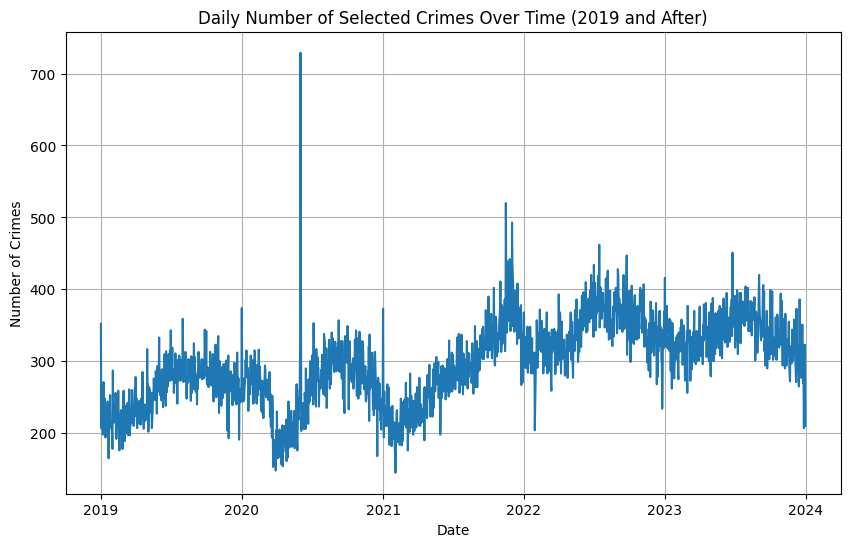

In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
crime_data = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv') #updated filterd data
crime_data['CMPLNT_FR_DT'] = pd.to_datetime(crime_data['CMPLNT_FR_DT'], errors='coerce')
# Group by date and count crimes
crime_per_day = crime_data.groupby(crime_data['CMPLNT_FR_DT'].dt.date).size()

# Plot the time series
plt.figure(figsize=(10, 6))
crime_per_day.plot()
plt.title('Daily Number of Selected Crimes Over Time (2019 and After)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

    # --- Task 2a: Bar Plot - Total Crimes by Borough ---


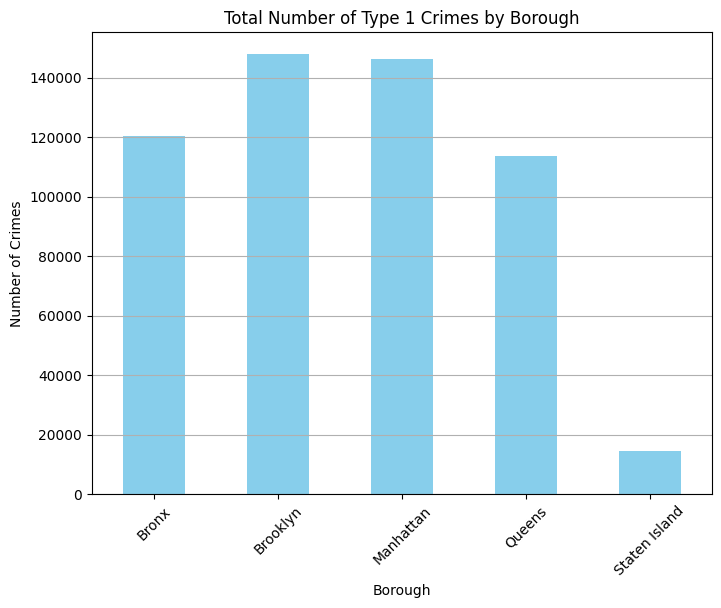

In [27]:
# Group crimes by 'BOROUGH' and count
crime_by_borough = crime_data.groupby('BOROUGH').size()

# Plot borough-level crimes
plt.figure(figsize=(8, 6))
crime_by_borough.plot(kind='bar', color='skyblue')
plt.title('Total Number of Type 1 Crimes by Borough')
plt.ylabel('Number of Crimes')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

    # --- Task 2b: Heatmap - Crimes by ZIP Code Normalized by Population ---

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.2 MB/s eta 0:00:00


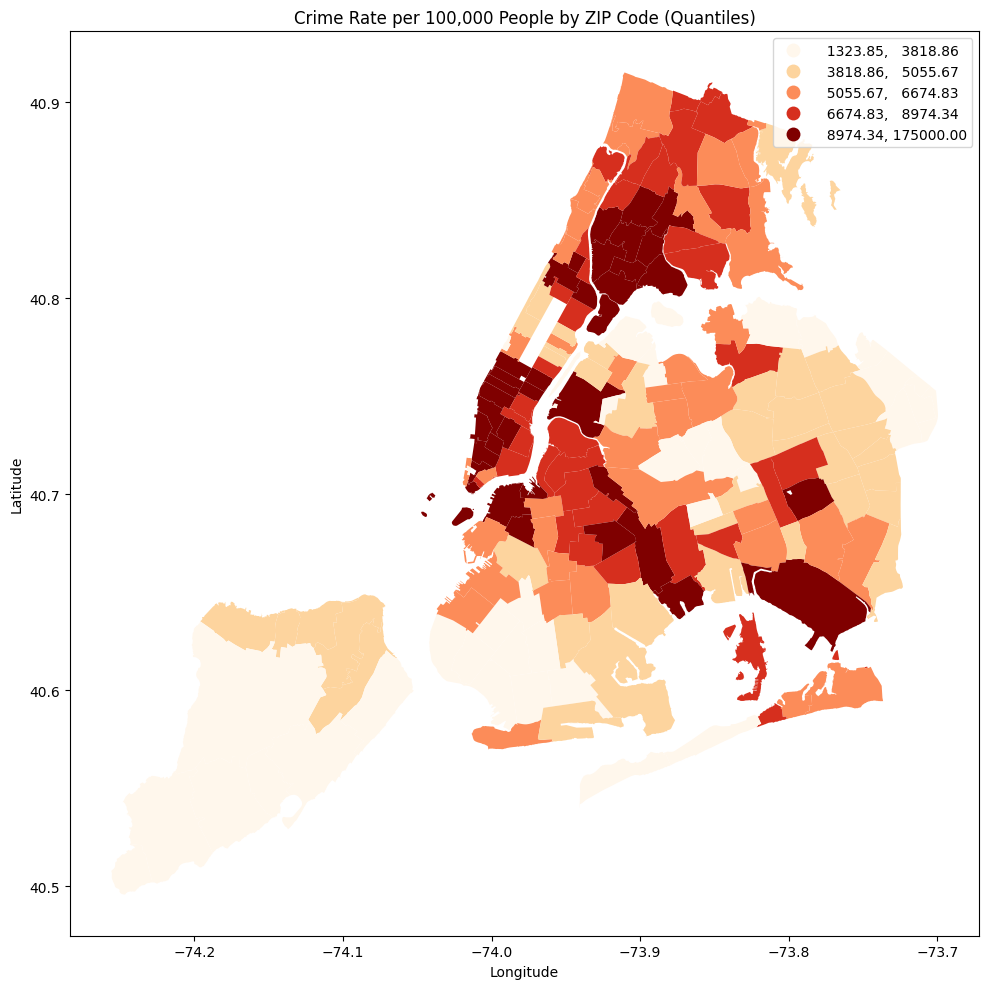

In [31]:
!pip install mapclassify
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# Load NYC ZIP code shapefile (includes population)
nyc_boundaries = gpd.read_file('/content/drive/MyDrive/NYPD_DATANEW/ZIPCODE/ZIP_CODE_040114.shp')

# Convert the crime data into a GeoDataFrame (if it isn't already)
geoCrime = gpd.GeoDataFrame(geoCrime, geometry=gpd.points_from_xy(geoCrime['Longitude'], geoCrime['Latitude']))

# Ensure CRS matches for both GeoDataFrames
geoCrime = geoCrime.set_crs(epsg=4326)
nyc_boundaries = nyc_boundaries.to_crs(epsg=4326)

# Spatial join to link crimes to ZIP codes
geoCrime_zip = gpd.sjoin(geoCrime, nyc_boundaries, how="inner", predicate="within", rsuffix='_boundary')

# Convert both ZIPCODE columns to string to ensure consistent data types
geoCrime_zip['ZIPCODE_left'] = geoCrime_zip['ZIPCODE_left'].astype(str)
nyc_boundaries['ZIPCODE'] = nyc_boundaries['ZIPCODE'].astype(str)

# Group crimes by ZIP code using 'ZIPCODE_left' from the original shapefile
zip_crime_count = geoCrime_zip.groupby('ZIPCODE_left').size().reset_index(name='Total_Crimes')

# Merge crime counts with population data from the ZIP boundaries
zip_data = pd.merge(zip_crime_count, nyc_boundaries[['ZIPCODE', 'POPULATION', 'geometry']], left_on='ZIPCODE_left', right_on='ZIPCODE')

# Filter out ZIP codes with zero or very small population to avoid division by zero or very large crime rates
zip_data = zip_data[zip_data['POPULATION'] > 0].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Normalize crime count by population (crimes per 100,000 people) using .loc[]
zip_data.loc[:, 'Crimes_Per_100k'] = (zip_data['Total_Crimes'] / zip_data['POPULATION']) * 100000

# Replace 'inf' values (if any) with NaN or some other value
zip_data.loc[:, 'Crimes_Per_100k'] = zip_data['Crimes_Per_100k'].replace([float('inf'), -float('inf')], pd.NA)

# Convert zip_data back to a GeoDataFrame for plotting
zip_data_gdf = gpd.GeoDataFrame(zip_data, geometry='geometry')

# Plot the heatmap using a quantile color scheme
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Plot the normalized crime rate as a heatmap
zip_data_gdf.plot(column='Crimes_Per_100k', cmap='OrRd', scheme='quantiles', legend=True, ax=ax)

# Add title and labels
plt.title('Crime Rate per 100,000 People by ZIP Code (Quantiles)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()

    #3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.

Missing or invalid times: 0


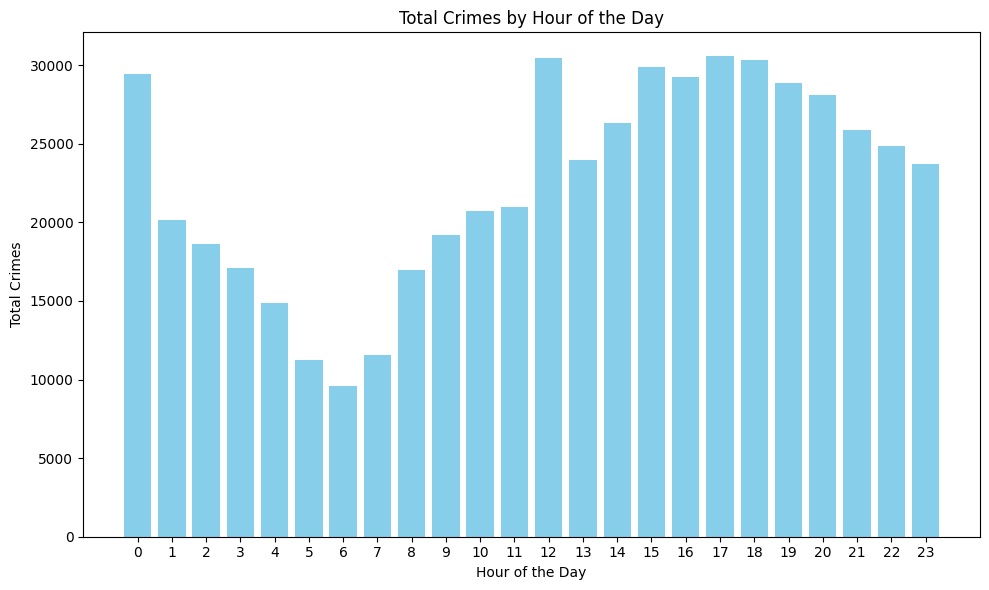

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format and check for missing time data
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')
geoCrime['CMPLNT_FR_TM'] = pd.to_datetime(geoCrime['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')

# Check for missing or invalid times
missing_times = geoCrime['CMPLNT_FR_TM'].isnull().sum()
print(f'Missing or invalid times: {missing_times}')

# If times are missing, fill with a default value or filter out those rows
geoCrime = geoCrime.dropna(subset=['CMPLNT_FR_TM'])

# Extract hour of the day from 'CMPLNT_FR_TM' if it exists
geoCrime['HourOfDay'] = geoCrime['CMPLNT_FR_TM'].dt.hour

# 3. Bar plot: Total crimes by hour of the day
hour_crimes = geoCrime.groupby('HourOfDay').size().reset_index(name='Total_Crimes')

plt.figure(figsize=(10, 6))
plt.bar(hour_crimes['HourOfDay'], hour_crimes['Total_Crimes'], color='skyblue')
plt.title('Total Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Crimes')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

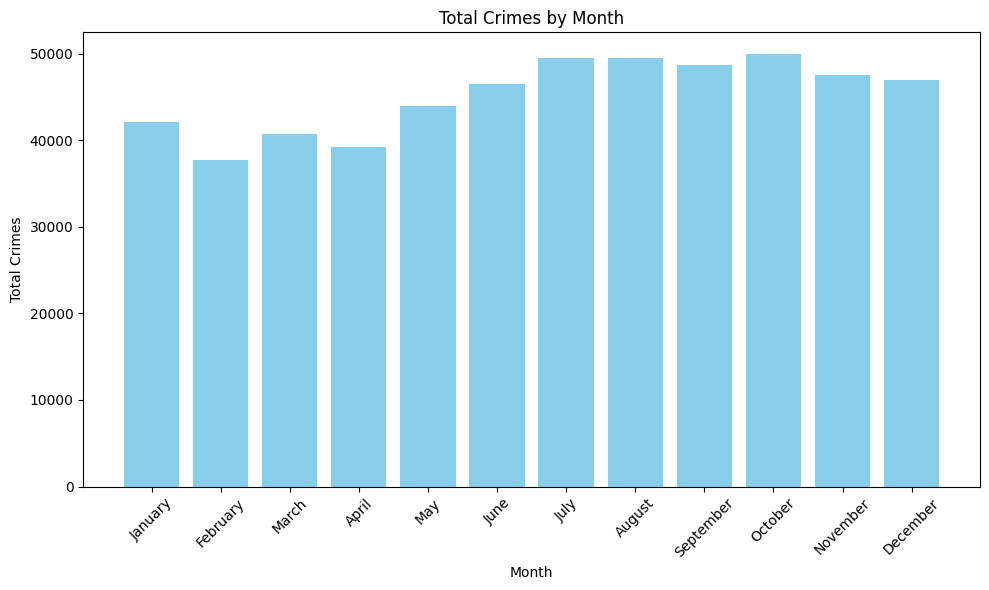

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Extract the month from the 'CMPLNT_FR_DT' column
geoCrime['Month'] = geoCrime['CMPLNT_FR_DT'].dt.month_name()

# Group crimes by month and count occurrences
month_crimes = geoCrime.groupby('Month').size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
).reset_index(name='Total_Crimes')

# Bar plot: Total crimes by month
plt.figure(figsize=(10, 6))
plt.bar(month_crimes['Month'], month_crimes['Total_Crimes'], color='skyblue')
plt.title('Total Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


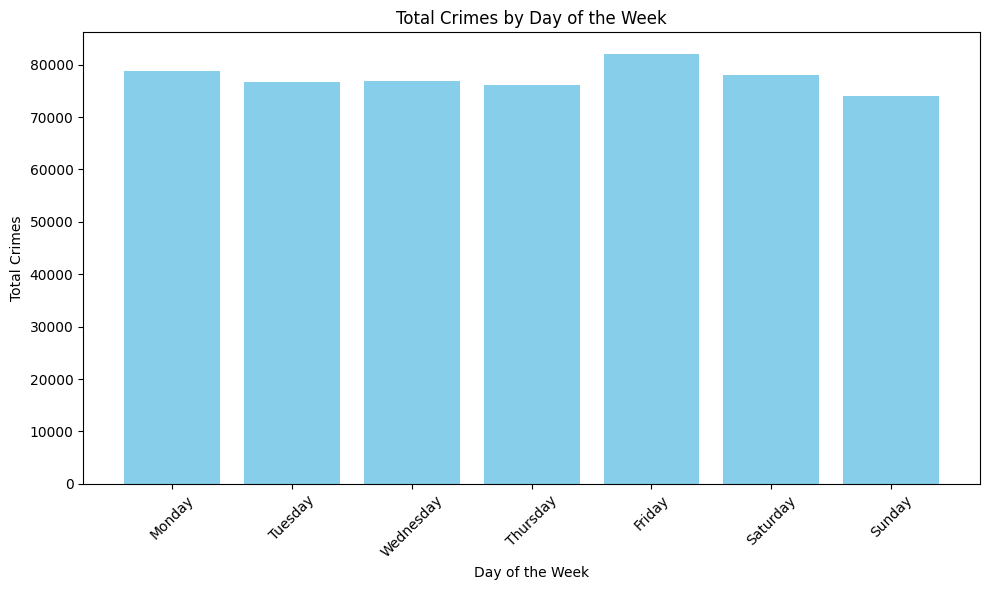

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Extract the day of the week from the 'CMPLNT_FR_DT' column
geoCrime['DayOfWeek'] = geoCrime['CMPLNT_FR_DT'].dt.day_name()

# Group crimes by day of the week and count occurrences
weekday_crimes = geoCrime.groupby('DayOfWeek').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='Total_Crimes')

# Bar plot: Total crimes by day of the week
plt.figure(figsize=(10, 6))
plt.bar(weekday_crimes['DayOfWeek'], weekday_crimes['Total_Crimes'], color='skyblue')
plt.title('Total Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    4# Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)

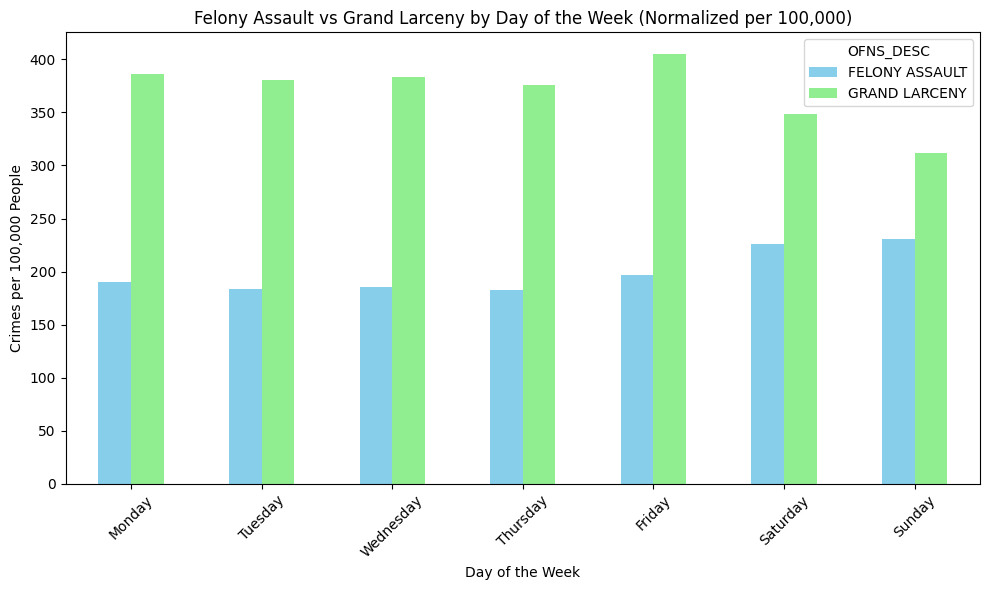

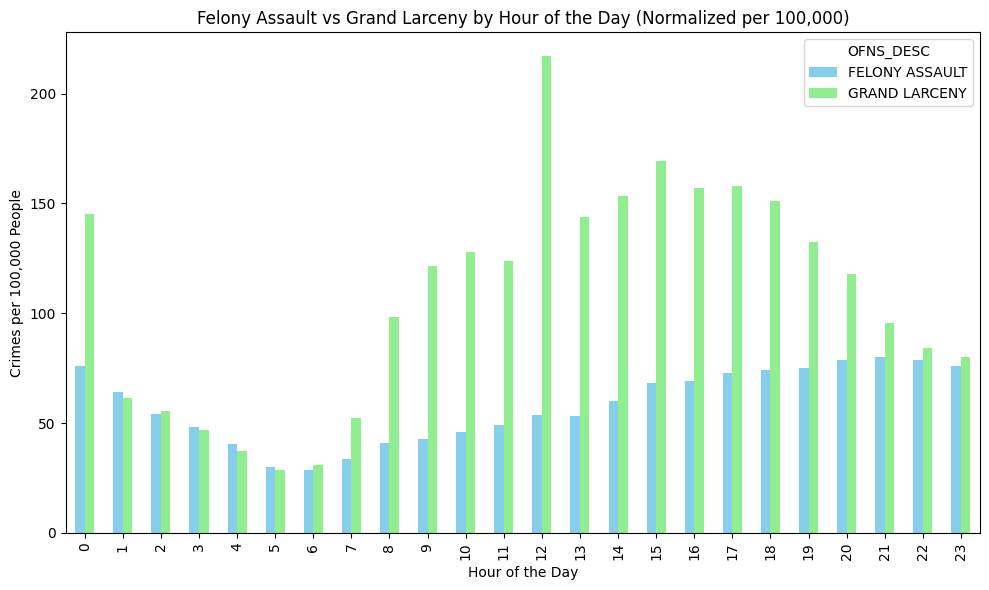

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the NYC ZIP code shapefile (includes population)
nyc_boundaries = gpd.read_file('/content/drive/MyDrive/NYPD_DATANEW/ZIPCODE/ZIP_CODE_040114.shp')

# Load the saved filtered crime data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# Calculate total city population from ZIP code shapefile (ensure 'POPULATION' column exists)
city_population = nyc_boundaries['POPULATION'].sum()

# Ensure 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')
geoCrime['CMPLNT_FR_TM'] = pd.to_datetime(geoCrime['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')

# Filter data for Felony Assault and Grand Larceny
filtered_data = geoCrime[geoCrime['OFNS_DESC'].isin(['FELONY ASSAULT', 'GRAND LARCENY'])].copy()

### Plot 1: Felony Assault vs Grand Larceny by Day of the Week (Normalized) ###
# Extract the day of the week
filtered_data.loc[:, 'DayOfWeek'] = filtered_data['CMPLNT_FR_DT'].dt.day_name()

# Group by 'DayOfWeek' and 'OFNS_DESC', then count the crimes
weekday_crimes = filtered_data.groupby(['DayOfWeek', 'OFNS_DESC']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).fillna(0)

# Normalize the crime numbers by total city population (per 100,000 people)
weekday_crimes_normalized = (weekday_crimes / city_population) * 100000

# Plot the bar plot for day of the week (normalized)
weekday_crimes_normalized.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Felony Assault vs Grand Larceny by Day of the Week (Normalized per 100,000)')
plt.xlabel('Day of the Week')
plt.ylabel('Crimes per 100,000 People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot 2: Felony Assault vs Grand Larceny by Hour of the Day (Normalized) ###
# Extract the hour of the day
filtered_data.loc[:, 'HourOfDay'] = filtered_data['CMPLNT_FR_TM'].dt.hour

# Group by 'HourOfDay' and 'OFNS_DESC', then count the crimes
hourly_crimes = filtered_data.groupby(['HourOfDay', 'OFNS_DESC']).size().unstack().fillna(0)

# Normalize the crime numbers by total city population (per 100,000 people)
hourly_crimes_normalized = (hourly_crimes / city_population) * 100000

# Plot the bar plot for hour of the day (normalized)
hourly_crimes_normalized.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Felony Assault vs Grand Larceny by Hour of the Day (Normalized per 100,000)')
plt.xlabel('Hour of the Day')
plt.ylabel('Crimes per 100,000 People')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


    5#Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough

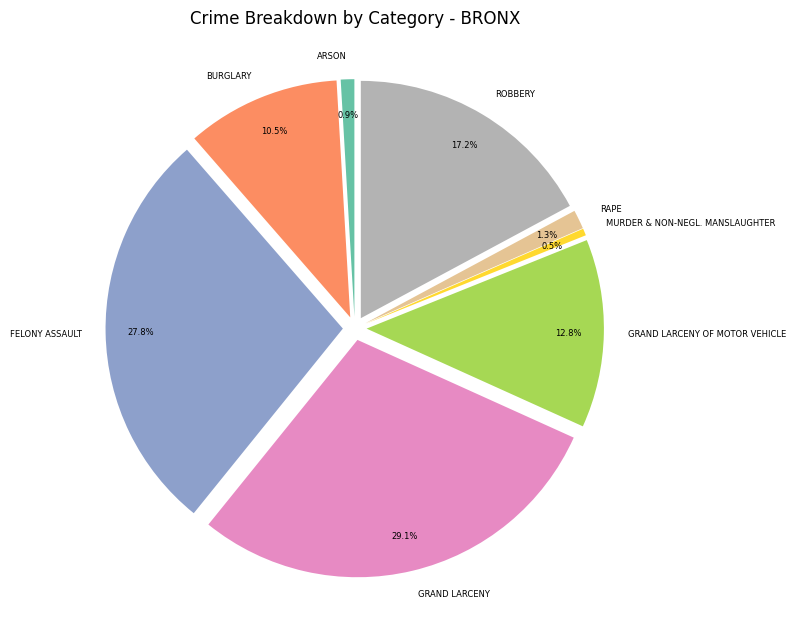

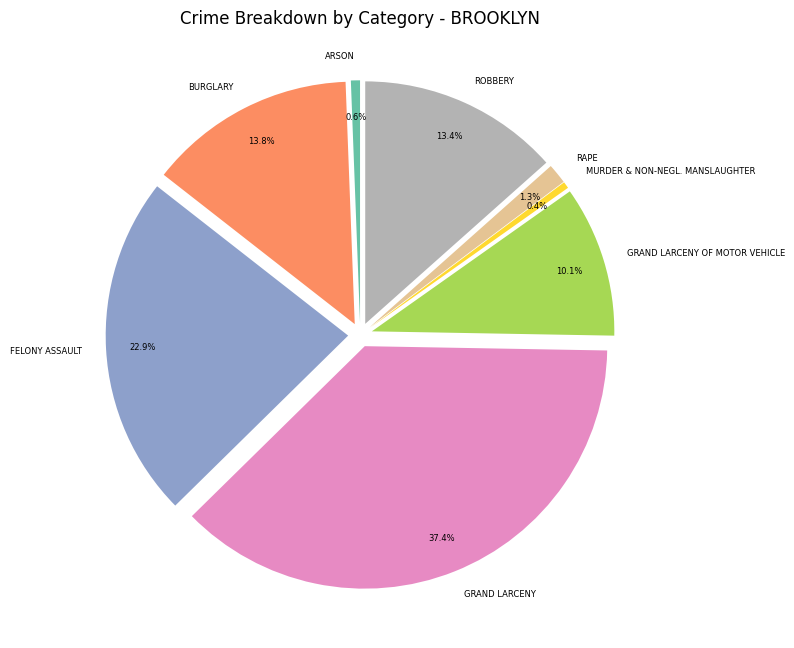

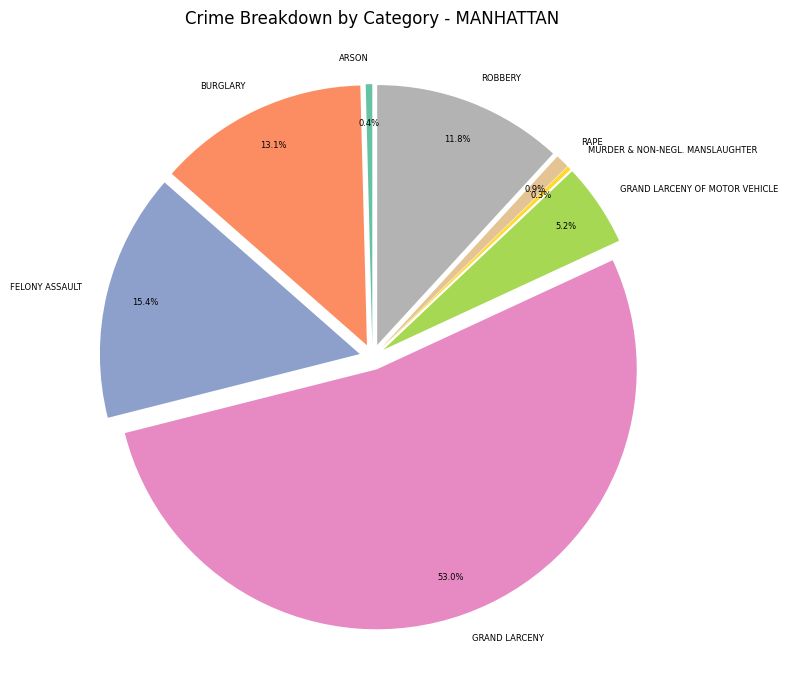

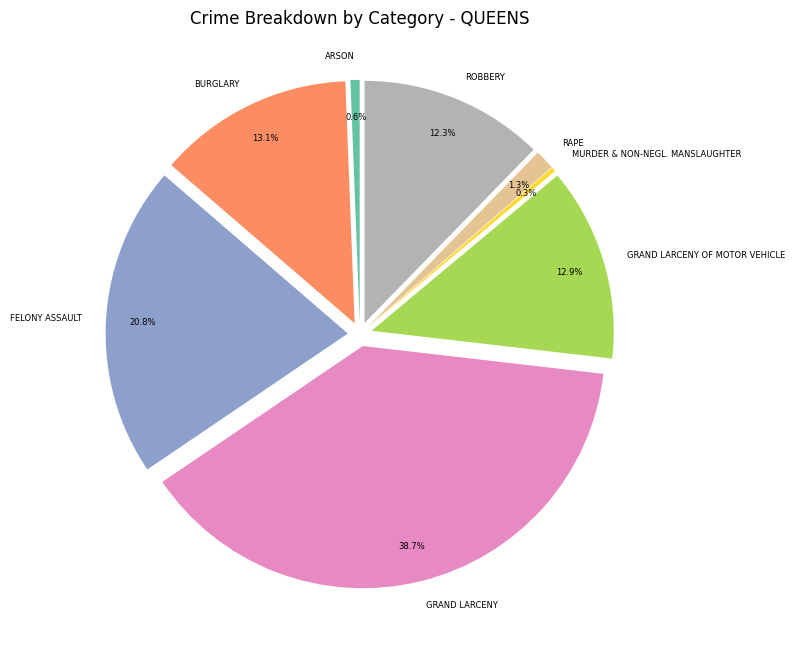

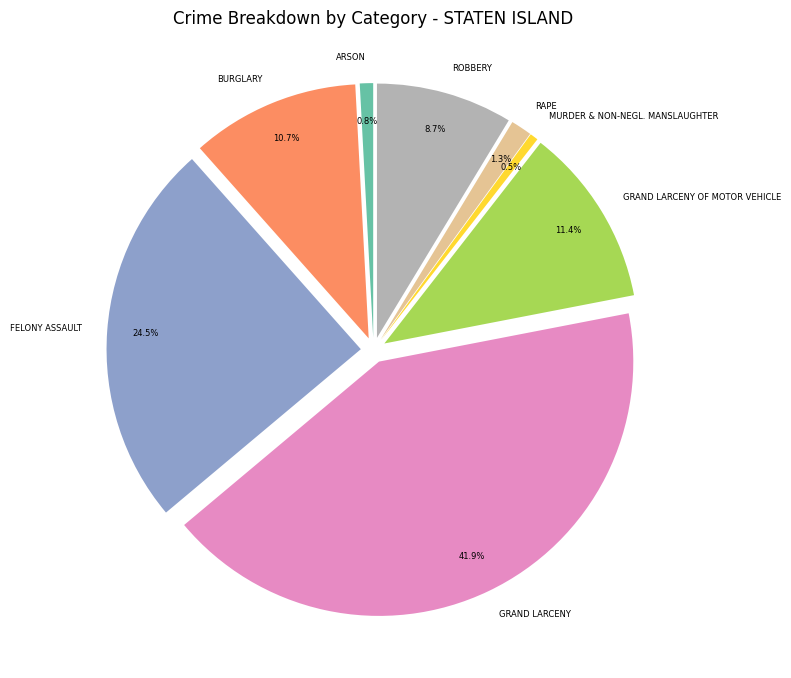

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# List of Type 1 crimes as per FBI's classification
type_1_crimes = ['FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
                 'BURGLARY', 'RAPE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'ARSON']

# Filter the data to include only Type 1 crimes
filtered_data = geoCrime[geoCrime['OFNS_DESC'].isin(type_1_crimes)].copy()

# Group by Borough and Crime Category (OFNS_DESC)
crime_by_borough_and_type = filtered_data.groupby(['BORO_NM', 'OFNS_DESC']).size().unstack().fillna(0)

# Calculate the percentage of each crime category within each borough
crime_by_borough_pct = crime_by_borough_and_type.div(crime_by_borough_and_type.sum(axis=1), axis=0) * 100

# Plot pie charts for each borough
boroughs = crime_by_borough_pct.index

for borough in boroughs:
    plt.figure(figsize=(8, 8))  # Adjust the figure size for better visibility
    explode = (0.05,) * len(crime_by_borough_pct.loc[borough])
    crime_by_borough_pct.loc[borough].plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colormap='Set2',
        textprops={'fontsize': 6},  # Reduce label size
        explode=explode,  # Explode slices
        pctdistance=0.85,  # Place percentage labels closer to the edge
        labeldistance=1.1  # Place category labels slightly further away
    )
    plt.title(f'Crime Breakdown by Category - {borough}', fontsize=12)  # Adjust title font size
    plt.ylabel('')  # Remove the y-label
    plt.tight_layout()
    plt.show()



Section 3 - Hypothesis testing tasks

    Plot the distribution (density plot) of daily number of total type 1 crimes for 2019. Test the hypothesis if the distribution follows normal distribution.

    Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level?



1 plotting distributions and normality test

    # Todo: group type 1 crime numbers per day for 2019
    # Todo: plot the distribution (density plot)
    # Todo: normality test



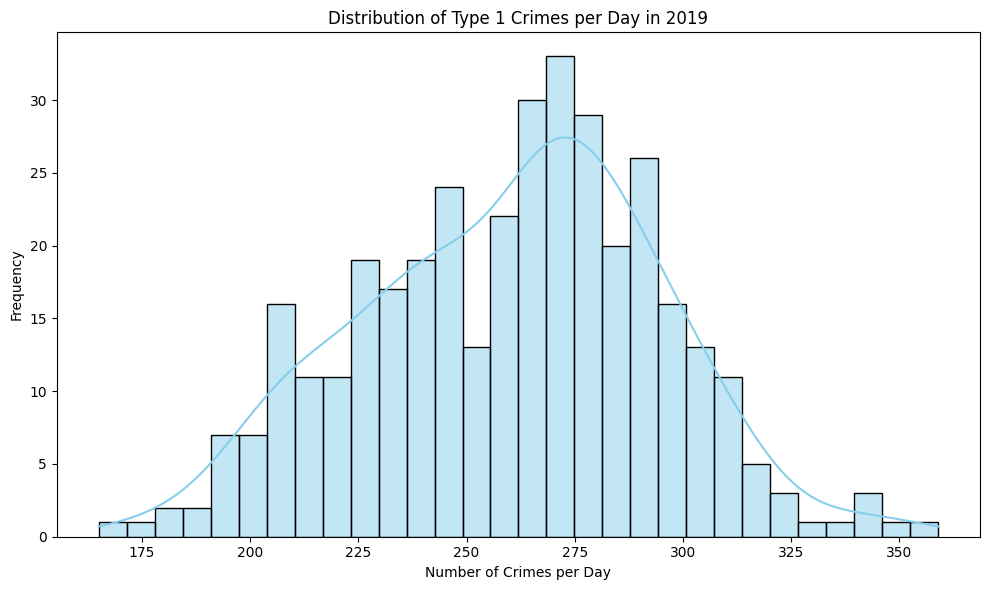

Shapiro-Wilk Test Statistic: 0.9928053464262534
p-value: 0.07703394882687323
Data follows a normal distribution (fail to reject H0).


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Filter for 2019 data
geoCrime_2019 = geoCrime[geoCrime['CMPLNT_FR_DT'].dt.year == 2019]

# Todo: Filter for Type 1 crimes (as per your crime list)
type1_crimes = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']
filtered_data = geoCrime_2019[geoCrime_2019['OFNS_DESC'].isin(type1_crimes)]

# Todo: Group Type 1 crime numbers per day
crime_per_day = filtered_data.groupby(filtered_data['CMPLNT_FR_DT'].dt.date).size()

# Todo: Plot the distribution (density plot)
plt.figure(figsize=(10, 6))
sns.histplot(crime_per_day, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Type 1 Crimes per Day in 2019')
plt.xlabel('Number of Crimes per Day')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Todo: Perform normality test (Shapiro-Wilk Test)
stat, p_value = shapiro(crime_per_day)
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretation of normality test
if p_value > 0.05:
    print("Data follows a normal distribution (fail to reject H0).")
else:
    print("Data does not follow a normal distribution (reject H0).")



weekdays vs weekend distribution

    # Todo: create dataframes for weekdays and weekends
    # Todo: group daily numbers for weekdays and weekends
    # Todo: plot distribution (density plot)
    # Todo: t-test
    # Todo: k-s test



    #Create DataFrames for Weekdays and Weekends:

In [38]:
import pandas as pd

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/NYPD_DATANEW/crimes_within_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Filter for 2019 data
geoCrime_2019 = geoCrime[geoCrime['CMPLNT_FR_DT'].dt.year == 2019]

# Filter for Type 1 crimes (as per your list of crimes)
type1_crimes = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
                'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']
filtered_data = geoCrime_2019[geoCrime_2019['OFNS_DESC'].isin(type1_crimes)]

# Extract the day of the week (0 = Monday, 6 = Sunday)
filtered_data['DayOfWeek'] = filtered_data['CMPLNT_FR_DT'].dt.dayofweek

# Create DataFrames for weekdays (0-4) and weekends (5-6)
weekdays_data = filtered_data[filtered_data['DayOfWeek'] < 5]
weekends_data = filtered_data[filtered_data['DayOfWeek'] >= 5]

# Display the shape of each DataFrame
print("Weekdays Data Shape:", weekdays_data.shape)
print("Weekends Data Shape:", weekends_data.shape)

Weekdays Data Shape: (68464, 50)
Weekends Data Shape: (26479, 50)


    #Group Daily Numbers for Weekdays and Weekends

In [39]:
# Group daily numbers for weekdays and weekends
weekdays_crimes_per_day = weekdays_data.groupby(weekdays_data['CMPLNT_FR_DT'].dt.date).size()
weekends_crimes_per_day = weekends_data.groupby(weekends_data['CMPLNT_FR_DT'].dt.date).size()

# Display the grouped data
print("Weekdays Crime Counts per Day:\n", weekdays_crimes_per_day.head())
print("Weekends Crime Counts per Day:\n", weekends_crimes_per_day.head())

Weekdays Crime Counts per Day:
 CMPLNT_FR_DT
2019-01-01    352
2019-01-02    207
2019-01-03    262
2019-01-04    266
2019-01-07    225
dtype: int64
Weekends Crime Counts per Day:
 CMPLNT_FR_DT
2019-01-05    235
2019-01-06    198
2019-01-12    235
2019-01-13    194
2019-01-19    244
dtype: int64


    #Plot Distribution (Density Plot)

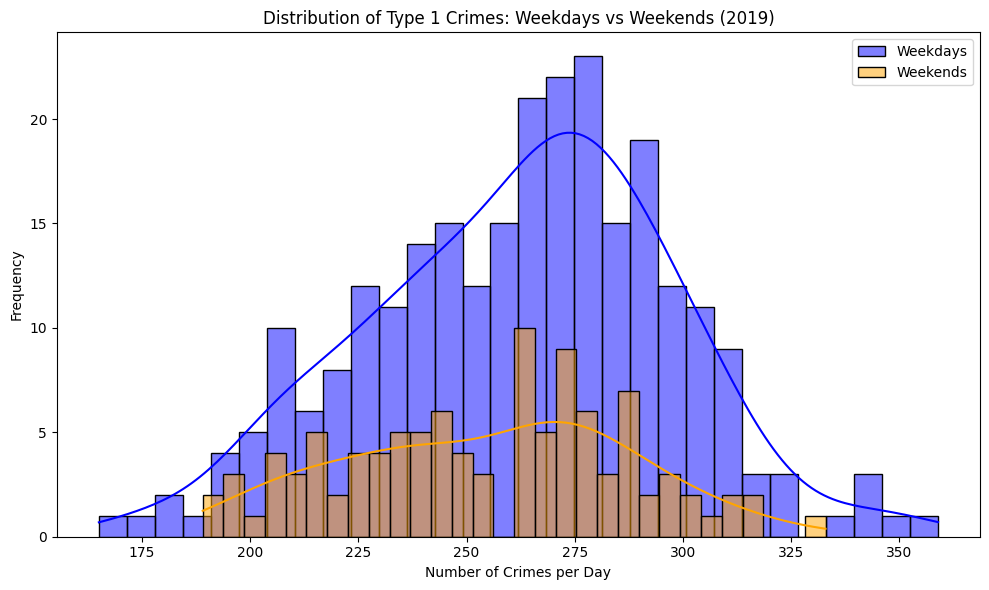

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(weekdays_crimes_per_day, kde=True, color='blue', label='Weekdays', bins=30)
sns.histplot(weekends_crimes_per_day, kde=True, color='orange', label='Weekends', bins=30)
plt.title('Distribution of Type 1 Crimes: Weekdays vs Weekends (2019)')
plt.xlabel('Number of Crimes per Day')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


    #Perform t-test

In [41]:
from scipy.stats import ttest_ind

# Perform t-test between weekdays and weekends
t_stat, p_value_ttest = ttest_ind(weekdays_crimes_per_day, weekends_crimes_per_day, equal_var=False)

# Display t-test results
print(f'T-Test Statistic: {t_stat}')
print(f'p-value (T-Test): {p_value_ttest}')

# Interpretation of the t-test
if p_value_ttest > 0.05:
    print("No significant difference between weekday and weekend crime rates (fail to reject H0).")
else:
    print("Significant difference between weekday and weekend crime rates (reject H0).")

T-Test Statistic: 1.9992986268520831
p-value (T-Test): 0.04691065540174828
Significant difference between weekday and weekend crime rates (reject H0).


    #Perform K-S Test

In [42]:
from scipy.stats import ks_2samp

# Perform K-S test
ks_stat, p_value_ks = ks_2samp(weekdays_crimes_per_day, weekends_crimes_per_day)

# Display K-S test results
print(f'K-S Test Statistic: {ks_stat}')
print(f'p-value (K-S Test): {p_value_ks}')

# Interpretation of the K-S test
if p_value_ks > 0.05:
    print("No significant difference between the distributions (fail to reject H0).")
else:
    print("Significant difference between the distributions (reject H0).")


K-S Test Statistic: 0.11788977306218686
p-value (K-S Test): 0.2301110711343979
No significant difference between the distributions (fail to reject H0).
